In [40]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import copy
import pandas as pd
import numpy as np
import os
PRJ_ROOT_DIR = os.path.dirname(os.path.abspath(''))

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Load Data

In [41]:
df_match = pd.read_csv(os.path.join(PRJ_ROOT_DIR, "data", "tabular", "clean", "matches.csv"))
df_match = df_match[df_match["season"] != "2022/23"]
df_match = df_match.fillna(0)
df_match                             

,home/gk_0,home/df_0,home/df_1,home/df_2,home/df_3,home/df_4,home/mf_0,home/mf_1,home/mf_2,home/mf_3,...,away/mf_2,away/mf_3,away/mf_4,away/fw_0,away/fw_1,away/fw_2,home/name,away/name,home_result,season
0,37096.0,55459.0,166640.0,219924.0,81012.0,0.0,101537.0,57531.0,86934.0,54102.0,...,20664.0,0.0,0.0,103955.0,205651.0,103025.0,West Ham United,Manchester City,lose,2019/20
1,37915.0,38290.0,55605.0,173904.0,158534.0,0.0,157668.0,62974.0,45268.0,231372.0,...,85242.0,148508.0,193488.0,213345.0,0.0,0.0,Tottenham Hotspur,Aston Villa,win,2019/20
2,116535.0,171287.0,97032.0,122798.0,169187.0,0.0,116643.0,41733.0,56979.0,0.0,...,71738.0,90440.0,78607.0,57127.0,0.0,0.0,Liverpool,Norwich City,win,2019/20
3,98747.0,68983.0,17761.0,51927.0,39487.0,0.0,40145.0,60586.0,433154.0,60551.0,...,101178.0,213482.0,0.0,84939.0,200439.0,83283.0,Burnley,Southampton,win,2019/20
4,51940.0,184667.0,95658.0,106760.0,214590.0,0.0,74208.0,176297.0,109322.0,156689.0,...,88894.0,49579.0,184341.0,173879.0,0.0,0.0,Manchester United,Chelsea,win,2019/20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,37096.0,55459.0,164555.0,60232.0,219924.0,0.0,217593.0,86934.0,180151.0,178186.0,...,432735.0,212325.0,78607.0,57127.0,0.0,0.0,West Ham United,Norwich City,win,2021/22
1072,40383.0,212721.0,450527.0,171771.0,0.0,0.0,78056.0,101178.0,244560.0,203389.0,...,432160.0,204580.0,226956.0,144485.0,446008.0,0.0,Southampton,Brentford,win,2021/22
1073,51940.0,76359.0,90152.0,106760.0,214590.0,0.0,220688.0,209243.0,62398.0,195851.0,...,200402.0,19624.0,0.0,102057.0,200600.0,222564.0,Manchester United,Wolverhampton Wanderers,lose,2021/22
1074,116535.0,97032.0,122798.0,60914.0,169187.0,0.0,116643.0,61558.0,206915.0,0.0,...,221399.0,80954.0,72222.0,200617.0,0.0,0.0,Liverpool,Leeds United,win,2021/22


In [42]:
df_player = pd.read_csv(os.path.join(PRJ_ROOT_DIR, "data", "tabular", "clean", "players.csv"))
df_player

,defence/clean_sheets,defence/goals_conceded,defence/tackles,defence/tackle_success_%,defence/last_man_tackles,defence/blocked_shots,defence/interceptions,defence/clearances,defence/headed_clearance,defence/clearances_off_line,...,goalkeeping/goal_kicks,defence/recoveries,defence/duels_won,defence/duels_lost,teamplay/passes,teamplay/crosses,teamplay/accurate_long_balls,id,name,season
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,468236.0,Yan Couto,2021/22
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,447880.0,Josh Wilson-Esbrand,2021/22
2,0.0,0.0,12.0,50.0,0.0,6.0,8.0,5.0,4.0,0.0,...,0.0,58.0,73.0,71.0,273.0,11.0,5.0,216646.0,Yoane Wissa,2021/22
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,491556.0,Charlie Whitaker,2021/22
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,515503.0,Jack Wells-Morrison,2021/22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,0.0,0.0,36.0,56.0,0.0,10.0,23.0,11.0,8.0,0.0,...,0.0,228.0,77.0,82.0,2157.0,56.0,98.0,56979.0,Jordan Henderson,2021/22
3054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,226956.0,Mads Roerslev,2020/21
3055,0.0,0.0,15.0,0.0,0.0,10.0,1.0,6.0,3.0,0.0,...,0.0,0.0,0.0,0.0,464.0,34.0,0.0,220688.0,Mason Greenwood,2021/22
3056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,445044.0,Dejan Kulusevski,2020/21


# 2. Feature Selection 

## Integrate 

In [283]:
def f(columns):
    column = []
    for i in range(len(columns)):
        if df_match[columns.name[:9]].iloc[i] != 0:
            column.append(df_player[columns.name[10:]][(df_player['id'] == df_match[columns.name[:9]].iloc[i]) & (df_player['season'] == df_match['season'].iloc[i])].values[0])
        else:
            column.append(np.nan)
    return column 

In [284]:
integrate_data = pd.DataFrame(columns = [t+'_'+i  for i in df_player.columns[:-3] for t in df_match.columns[:-4]])
integrate_data['result'] = df_match['home_result']#.replace({'win': 1, 'lose': 0, 'draw': 2})
integrate_data[integrate_data.columns[:-1]] = integrate_data[integrate_data.columns[:-1]].apply(f,axis = 0)

integrate_data

,home/gk_0_defence/clean_sheets,home/df_0_defence/clean_sheets,home/df_1_defence/clean_sheets,home/df_2_defence/clean_sheets,home/df_3_defence/clean_sheets,home/df_4_defence/clean_sheets,home/mf_0_defence/clean_sheets,home/mf_1_defence/clean_sheets,home/mf_2_defence/clean_sheets,home/mf_3_defence/clean_sheets,...,away/df_3_teamplay/accurate_long_balls,away/mf_0_teamplay/accurate_long_balls,away/mf_1_teamplay/accurate_long_balls,away/mf_2_teamplay/accurate_long_balls,away/mf_3_teamplay/accurate_long_balls,away/mf_4_teamplay/accurate_long_balls,away/fw_0_teamplay/accurate_long_balls,away/fw_1_teamplay/accurate_long_balls,away/fw_2_teamplay/accurate_long_balls,result
0,5.0,11.0,3.0,4.0,6.0,NaN,0.0,0.0,0.0,0.0,...,59.0,171.0,121.0,30.0,NaN,NaN,0.0,0.0,0.0,lose
1,6.0,4.0,7.0,4.0,2.0,NaN,0.0,0.0,0.0,0.0,...,30.0,82.0,81.0,20.0,9.0,0.0,0.0,NaN,NaN,win
2,13.0,12.0,1.0,9.0,12.0,NaN,0.0,0.0,0.0,NaN,...,31.0,30.0,90.0,0.0,27.0,81.0,0.0,NaN,NaN,win
3,11.0,6.0,15.0,13.0,6.0,NaN,0.0,0.0,0.0,0.0,...,NaN,43.0,46.0,81.0,1.0,NaN,0.0,0.0,38.0,win
4,13.0,12.0,13.0,7.0,11.0,NaN,0.0,0.0,0.0,0.0,...,22.0,132.0,93.0,39.0,0.0,26.0,0.0,NaN,NaN,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,8.0,7.0,5.0,5.0,2.0,NaN,0.0,0.0,0.0,0.0,...,41.0,21.0,6.0,0.0,86.0,46.0,0.0,NaN,NaN,win
1136,3.0,1.0,6.0,7.0,NaN,NaN,0.0,0.0,3.0,0.0,...,NaN,74.0,0.0,9.0,52.0,10.0,0.0,24.0,NaN,win
1137,8.0,0.0,5.0,3.0,3.0,NaN,0.0,0.0,0.0,0.0,...,NaN,20.0,197.0,19.0,132.0,NaN,0.0,25.0,0.0,lose
1138,20.0,21.0,16.0,17.0,17.0,NaN,0.0,0.0,0.0,NaN,...,60.0,53.0,0.0,20.0,0.0,26.0,8.0,NaN,NaN,win


In [285]:
for i in integrate_data.columns:
    m = list(integrate_data.columns).index(i)
    if i[5:9] == 'gk_0':
        integrate_data[i[:5]+'gk'+i[9:]] = integrate_data[i]
    if i[:9] == 'home/df_0':
        integrate_data[i[:5]+'df'+i[9:]] = integrate_data[[integrate_data.columns[m+t] for t in range(5)]].sum(axis  =1)
    if i[:9] == 'away/df_0':
        integrate_data[i[:5]+'df'+i[9:]] = integrate_data[[integrate_data.columns[m+t] for t in range(4)]].sum(axis  =1)
    if i[5:9] == 'mf_0':
        integrate_data[i[:5]+'mf'+i[9:]] = integrate_data[[integrate_data.columns[m+t] for t in range(5)]].sum(axis = 1)
    if i[5:9] == 'fw_0':
        integrate_data[i[:5]+'fw'+i[9:]] = integrate_data[[integrate_data.columns[m+t] for t in range(3)]].sum(axis = 1)
df_integrate = integrate_data[integrate_data.columns[-409:]]
df_integrate
        

,result,home/gk_defence/clean_sheets,home/df_defence/clean_sheets,home/mf_defence/clean_sheets,home/fw_defence/clean_sheets,away/gk_defence/clean_sheets,away/df_defence/clean_sheets,away/mf_defence/clean_sheets,away/fw_defence/clean_sheets,home/gk_defence/goals_conceded,...,away/mf_teamplay/crosses,away/fw_teamplay/crosses,home/gk_teamplay/accurate_long_balls,home/df_teamplay/accurate_long_balls,home/mf_teamplay/accurate_long_balls,home/fw_teamplay/accurate_long_balls,away/gk_teamplay/accurate_long_balls,away/df_teamplay/accurate_long_balls,away/mf_teamplay/accurate_long_balls,away/fw_teamplay/accurate_long_balls
0,lose,5.0,24.0,0.0,0.0,16.0,16.0,0.0,0.0,34.0,...,345.0,142.0,201.0,234.0,196.0,0.0,124.0,268.0,322.0,0.0
1,win,6.0,17.0,0.0,0.0,4.0,13.0,0.0,0.0,21.0,...,493.0,7.0,122.0,239.0,152.0,0.0,118.0,211.0,192.0,0.0
2,win,13.0,34.0,0.0,0.0,5.0,11.0,0.0,0.0,23.0,...,247.0,8.0,115.0,408.0,251.0,0.0,247.0,196.0,228.0,0.0
3,win,11.0,40.0,0.0,0.0,2.0,18.0,7.0,0.0,37.0,...,399.0,83.0,279.0,277.0,273.0,0.0,43.0,227.0,171.0,38.0
4,win,13.0,43.0,0.0,0.0,8.0,20.0,0.0,0.0,36.0,...,186.0,11.0,96.0,290.0,190.0,0.0,131.0,245.0,290.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,win,8.0,19.0,0.0,0.0,5.0,18.0,0.0,0.0,50.0,...,234.0,13.0,219.0,236.0,232.0,0.0,193.0,240.0,159.0,0.0
1136,win,3.0,14.0,3.0,0.0,1.0,19.0,1.0,0.0,35.0,...,183.0,103.0,121.0,198.0,196.0,23.0,80.0,132.0,145.0,24.0
1137,lose,8.0,11.0,0.0,0.0,11.0,32.0,12.0,0.0,57.0,...,244.0,93.0,116.0,129.0,107.0,0.0,143.0,336.0,368.0,25.0
1138,win,20.0,71.0,0.0,0.0,5.0,7.0,0.0,0.0,24.0,...,368.0,65.0,152.0,536.0,175.0,0.0,151.0,243.0,99.0,8.0


In [292]:
def t(row):
    count = 0
    for i in row: 
        if i != 0:
            count += 1
    return count
for i in df_match.columns:
    m = list(df_match.columns).index(i)
    if i[:9] == 'home/df_0':
        df_integrate['home/df_num'] = df_match[[df_match.columns[m+t] for t in range(5)]].apply(t, axis = 1)
    if i[:9] == 'away/df_0':
        df_integrate['away/df_num'] = df_match[[df_match.columns[m+t] for t in range(4)]].apply(t, axis = 1)
    if i[:9] == 'home/mf_0':
        df_integrate['home/mf_num'] = df_match[[df_match.columns[m+t] for t in range(5)]].apply(t, axis = 1)
    if i[:9] == 'away/mf_0':
        df_integrate['away/mf_num'] = df_match[[df_match.columns[m+t] for t in range(5)]].apply(t, axis = 1)
    if i[:9] == 'home/fw_0':
        df_integrate['home/fw_num'] = df_match[[df_match.columns[m+t] for t in range(3)]].apply(t, axis = 1)
    if i[:9] == 'away/fw_0':
        df_integrate['away/fw_num'] = df_match[[df_match.columns[m+t] for t in range(3)]].apply(t, axis = 1)
df_integrate

,result,home/gk_defence/clean_sheets,home/df_defence/clean_sheets,home/mf_defence/clean_sheets,home/fw_defence/clean_sheets,away/gk_defence/clean_sheets,away/df_defence/clean_sheets,away/mf_defence/clean_sheets,away/fw_defence/clean_sheets,home/gk_defence/goals_conceded,...,away/gk_teamplay/accurate_long_balls,away/df_teamplay/accurate_long_balls,away/mf_teamplay/accurate_long_balls,away/fw_teamplay/accurate_long_balls,home/df_num,home/mf_num,home/fw_num,away/df_num,away/mf_num,away/fw_num
0,lose,5.0,24.0,0.0,0.0,16.0,16.0,0.0,0.0,34.0,...,124.0,268.0,322.0,0.0,4,5,1,4,3,3
1,win,6.0,17.0,0.0,0.0,4.0,13.0,0.0,0.0,21.0,...,118.0,211.0,192.0,0.0,4,4,2,4,5,1
2,win,13.0,34.0,0.0,0.0,5.0,11.0,0.0,0.0,23.0,...,247.0,196.0,228.0,0.0,4,3,3,4,5,1
3,win,11.0,40.0,0.0,0.0,2.0,18.0,7.0,0.0,37.0,...,43.0,227.0,171.0,38.0,4,4,2,3,4,3
4,win,13.0,43.0,0.0,0.0,8.0,20.0,0.0,0.0,36.0,...,131.0,245.0,290.0,0.0,4,5,1,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,win,8.0,19.0,0.0,0.0,5.0,18.0,0.0,0.0,50.0,...,193.0,240.0,159.0,0.0,4,5,1,4,5,1
1136,win,3.0,14.0,3.0,0.0,1.0,19.0,1.0,0.0,35.0,...,80.0,132.0,145.0,24.0,3,5,2,3,5,2
1137,lose,8.0,11.0,0.0,0.0,11.0,32.0,12.0,0.0,57.0,...,143.0,336.0,368.0,25.0,4,4,2,3,4,3
1138,win,20.0,71.0,0.0,0.0,5.0,7.0,0.0,0.0,24.0,...,151.0,243.0,99.0,8.0,4,3,3,4,5,1


In [378]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scale=scaler.fit_transform(df_integrate[df_integrate.columns[1:]])
df_scale = pd.DataFrame(df_scale, columns = df_integrate.columns[1:])
df_scale['result'] = df_integrate['result']
df_scale

,home/gk_defence/clean_sheets,home/df_defence/clean_sheets,home/mf_defence/clean_sheets,home/fw_defence/clean_sheets,away/gk_defence/clean_sheets,away/df_defence/clean_sheets,away/mf_defence/clean_sheets,away/fw_defence/clean_sheets,home/gk_defence/goals_conceded,home/df_defence/goals_conceded,...,away/df_teamplay/accurate_long_balls,away/mf_teamplay/accurate_long_balls,away/fw_teamplay/accurate_long_balls,home/df_num,home/mf_num,home/fw_num,away/df_num,away/mf_num,away/fw_num,result
0,-0.879040,-0.084429,-0.454857,0.0,1.287102,-0.717669,-0.469989,-0.059339,-0.421098,0.774797,...,0.054384,1.385772,-0.473397,0.357145,1.042976,-1.162968,0.553030,-1.554362,1.210494,lose
1,-0.684758,-0.650599,-0.454857,0.0,-1.025726,-0.957829,-0.469989,-0.059339,-0.983219,-0.163828,...,-0.506636,-0.068999,-0.473397,0.357145,-0.267931,0.036836,0.553030,1.084465,-1.210494,win
2,0.675215,0.724385,-0.454857,0.0,-0.832990,-1.117935,-0.469989,-0.059339,-0.896739,-0.744882,...,-0.654273,0.333861,-0.473397,0.357145,-1.578838,1.236640,0.553030,1.084465,-1.210494,win
3,0.286651,1.209674,-0.454857,0.0,-1.411197,-0.557563,0.816195,-0.059339,-0.291377,0.841842,...,-0.349157,-0.304000,1.386192,0.357145,-0.267931,0.036836,-1.808221,-0.234948,1.210494,win
4,0.675215,1.452318,-0.454857,0.0,-0.254783,-0.397457,-0.469989,-0.059339,-0.334618,-0.163828,...,-0.171993,1.027675,-0.473397,0.357145,1.042976,-1.162968,0.553030,1.084465,-1.210494,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,-0.296195,-0.488836,-0.454857,0.0,-0.832990,-0.557563,-0.469989,-0.059339,0.270744,0.238440,...,-0.221205,-0.438287,-0.473397,0.357145,1.042976,-1.162968,0.553030,1.084465,-1.210494,win
1136,-1.267604,-0.893243,0.103911,0.0,-1.603933,-0.477510,-0.286248,-0.059339,-0.377858,0.126699,...,-1.284189,-0.594954,0.701080,-1.699143,1.042976,0.036836,-1.808221,1.084465,0.000000,win
1137,-0.296195,-1.135887,-0.454857,0.0,0.323424,0.563181,1.734898,-0.059339,0.573424,-0.878971,...,0.723671,1.900537,0.750017,0.357145,-0.267931,0.036836,-1.808221,-0.234948,1.210494,lose
1138,2.035188,3.716998,-0.454857,0.0,-0.832990,-1.438148,-0.469989,-0.059339,-0.853498,-0.878971,...,-0.191677,-1.109719,-0.081904,0.357145,-1.578838,1.236640,0.553030,1.084465,-1.210494,win


In [379]:
df_scale.to_csv(os.path.join(PRJ_ROOT_DIR, "data", "tabular", "integrate","new_matches_scale.csv"), index = False)

In [43]:
df_scale = pd.read_csv(os.path.join(PRJ_ROOT_DIR, "data", "tabular", "integrate","new_matches_scale.csv"))
df_scale

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Documents\\GitHub\\ds-epl-matches\\data\\tabular\\integrate\\new_matches_scale.csv'

## Feature Importance

In [380]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
# prepare data 
from sklearn.model_selection import train_test_split

X = df_scale.iloc[:,:-1]
y = df_scale.iloc[:, -1].replace({'win': 1, 'lose': 0, 'draw': 2})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)  # train and test set
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=.1, random_state=42)  # train and dev set

X_train = X_train.iloc[:,:-6]
importance = np.zeros((1,408))
for i in range(10):
    model = XGBClassifier()
#     model = RandomForestClassifier()
    # fit the model
    model.fit(X_train, y_train)
    # get importance
    importance = np.concatenate((importance,[model.feature_importances_]), axis =0)
importance = importance.mean(axis =0 )
thes = 0.05
# summarize feature importance
idx = []
for i,v in enumerate(importance):
    if v > thes :
        idx.append(i)
        print('Feature: %0d, Score: %.5f' % (i,v))
print(len(idx),idx)
# # plot feature importance
# plt.figure(figsize=(30,40))
# plt.bar([x for x in range(len(importance))if importance[x] >thes], [x for x in importance if x >thes])
# plt.show()
full = pd.read_csv('../data/tabular/integrate/new_matches_scale.csv')
full

0 []


,home/mf_num,home/fw_num,away/df_num,away/mf_num,away/fw_num,result
0,1.042976,-1.162968,0.553030,-1.554362,1.210494,lose
1,-0.267931,0.036836,0.553030,1.084465,-1.210494,win
2,-1.578838,1.236640,0.553030,1.084465,-1.210494,win
3,-0.267931,0.036836,-1.808221,-0.234948,1.210494,win
4,1.042976,-1.162968,0.553030,1.084465,-1.210494,win
...,...,...,...,...,...,...
1135,1.042976,-1.162968,0.553030,1.084465,-1.210494,win
1136,1.042976,0.036836,-1.808221,1.084465,0.000000,win
1137,-0.267931,0.036836,-1.808221,-0.234948,1.210494,lose
1138,-1.578838,1.236640,0.553030,1.084465,-1.210494,win


# 3.Outliner remove

## Detection

### Visualization

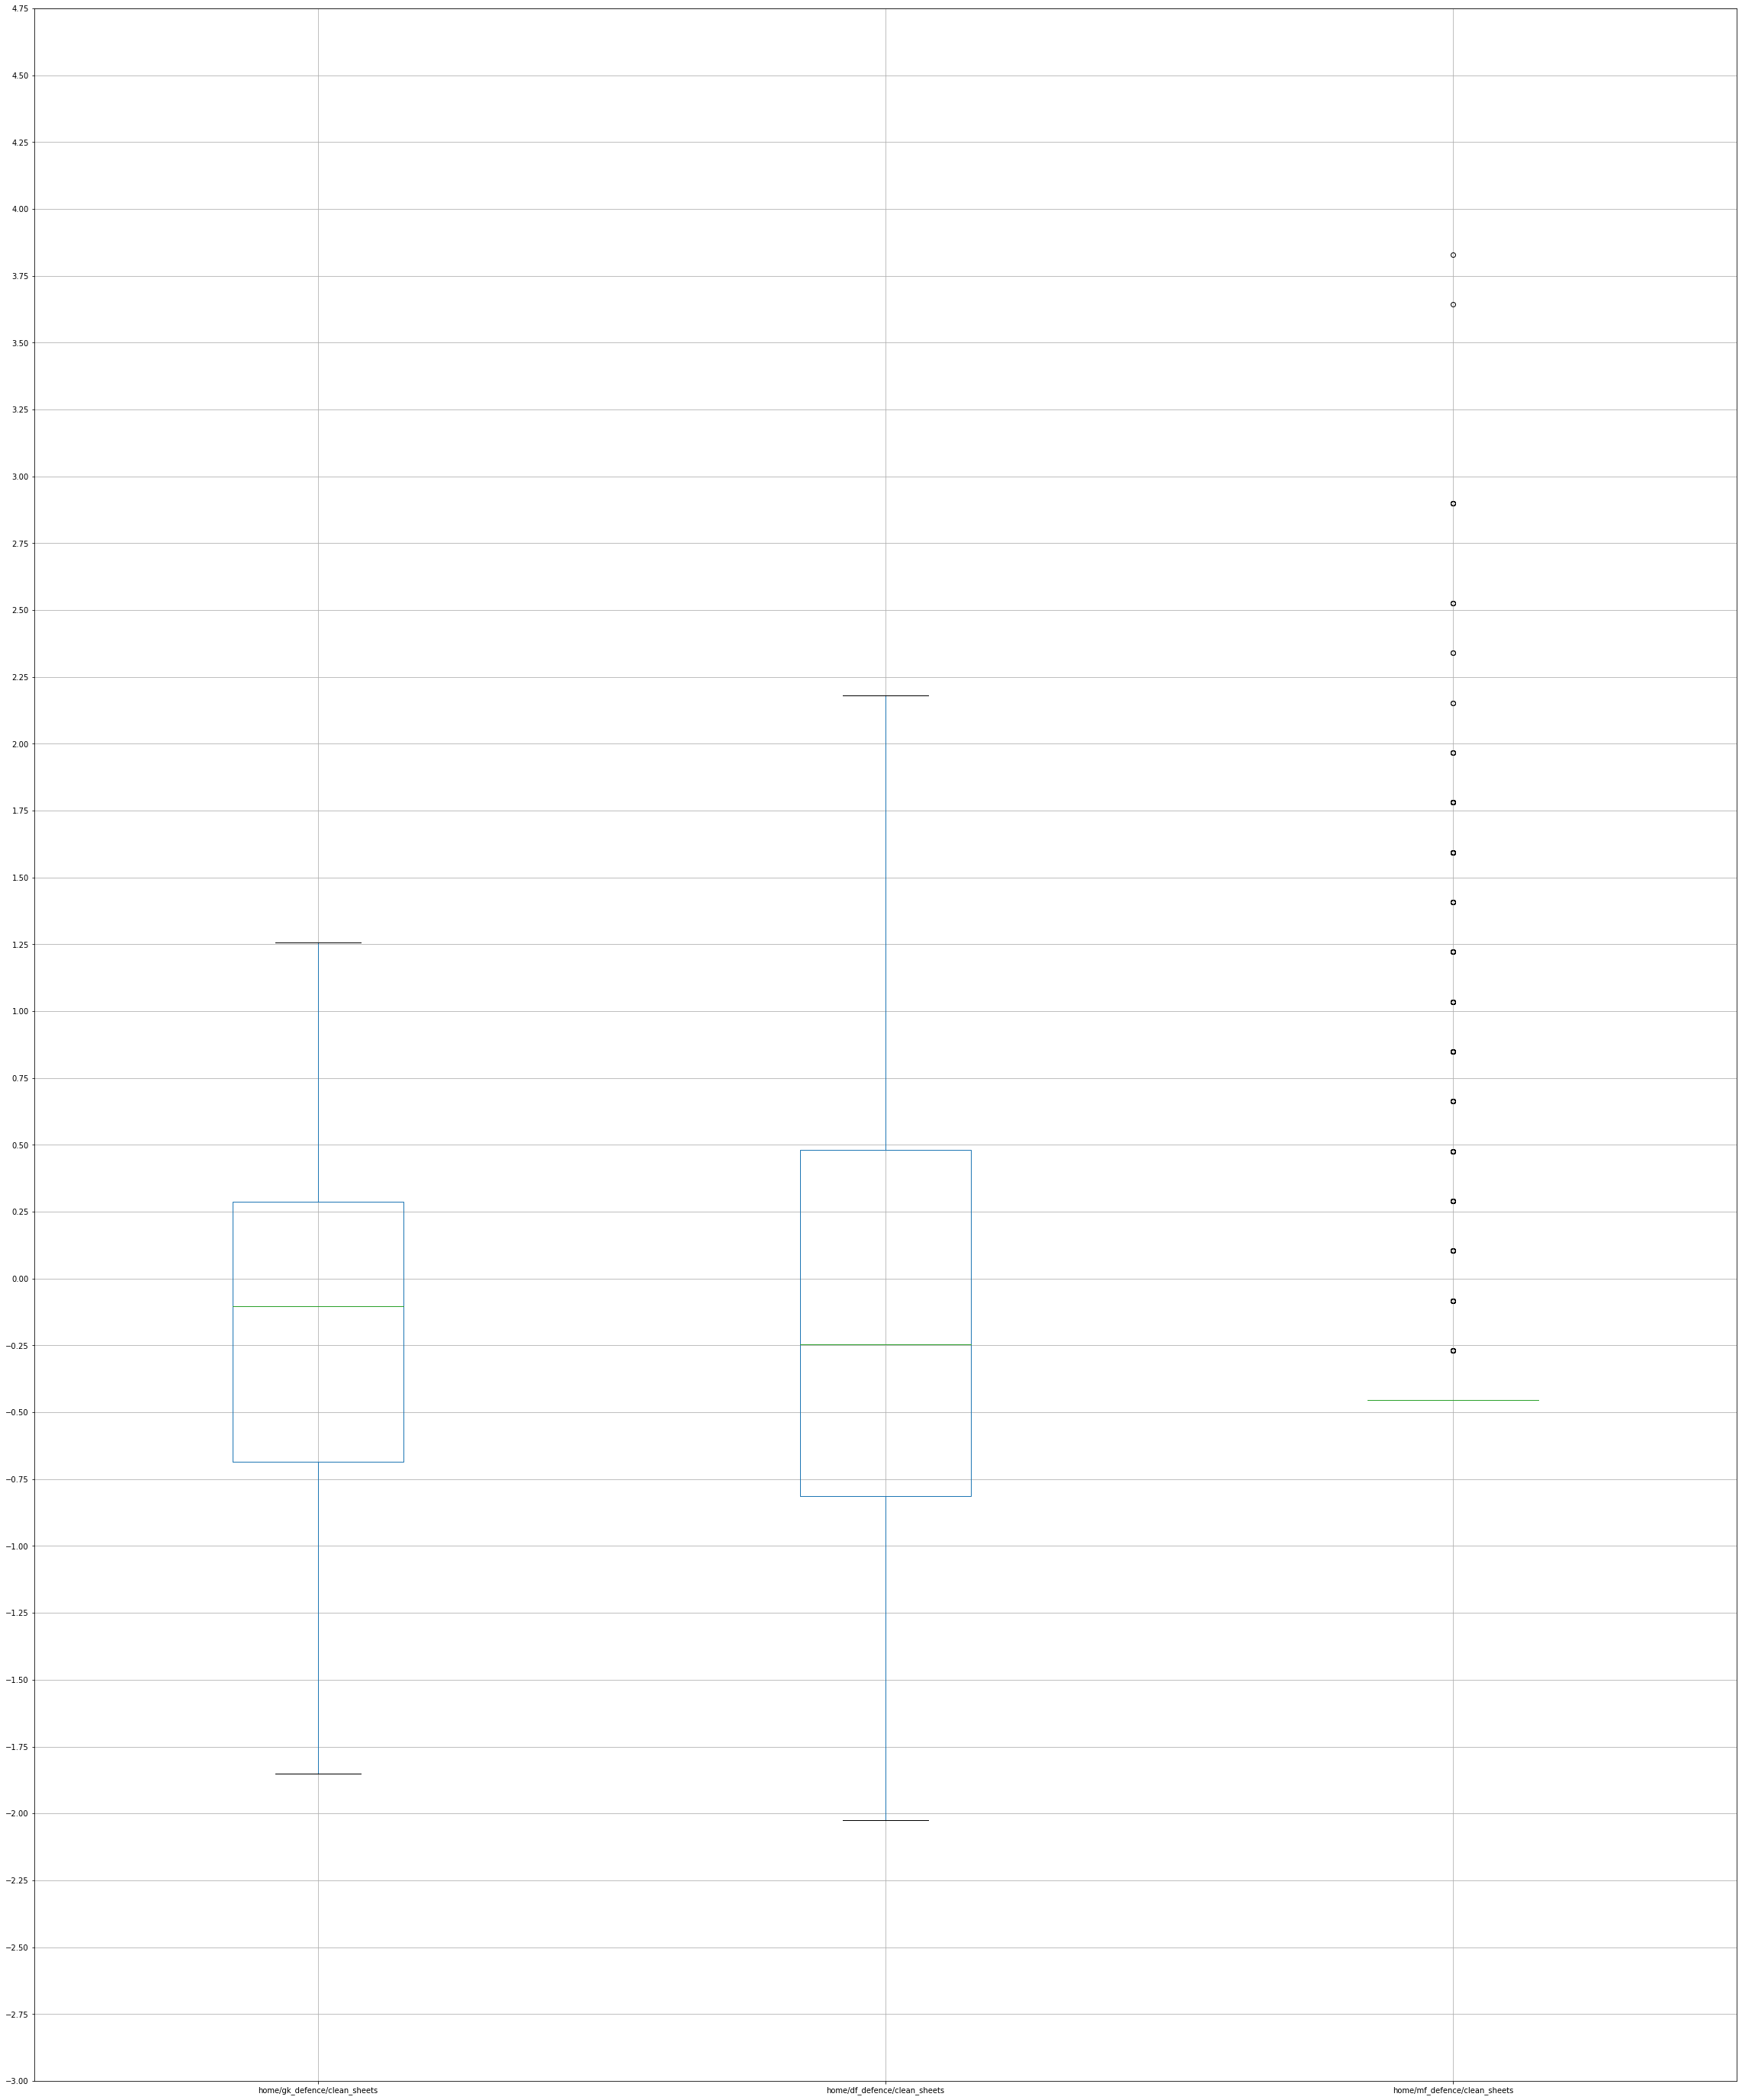

In [358]:
ax = df_scale[df_scale.columns[0:3]].boxplot(figsize=(40,50))
plt.yticks([i/4 for i in range(-3*4,5*4)])
plt.show()

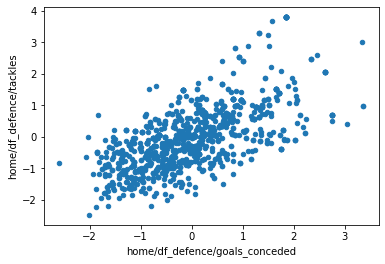

In [272]:
ax2 = df_scale.plot.scatter(df_scale.columns[1],df_scale.columns[0])
plt.show()

In [375]:
for i in df_scale.columns[:-1]:
    
    Q1 = np.percentile(df_scale[i], 25,
                       interpolation = 'midpoint')

    Q3 = np.percentile(df_scale[i], 75,
                       interpolation = 'midpoint')
    IQR = Q3 - Q1

    # Upper bound
    upper = np.where(df_scale[i] >= (Q3+1.5*IQR))
#     print(upper)
    # Lower bound
    lower = np.where(df_scale[i] <= (Q1-1.5*IQR))

    ''' Removing the Outliers '''
    df_scale.drop(upper[0], inplace = True, errors ='ignore')
    df_scale.drop(lower[0], inplace = True, errors = 'ignore')

df_scale

,home/gk_defence/clean_sheets,home/df_defence/clean_sheets,home/mf_defence/clean_sheets,home/fw_defence/clean_sheets,away/gk_defence/clean_sheets,away/df_defence/clean_sheets,away/mf_defence/clean_sheets,away/fw_defence/clean_sheets,home/gk_defence/goals_conceded,home/df_defence/goals_conceded,...,away/df_teamplay/accurate_long_balls,away/mf_teamplay/accurate_long_balls,away/fw_teamplay/accurate_long_balls,home/df_num,home/mf_num,home/fw_num,away/df_num,away/mf_num,away/fw_num,result
829,1.258060,0.967030,0.476424,0.0,3.985402,-0.077244,-0.469989,-0.059339,-0.161657,-1.057757,...,-0.890491,-0.941861,0.211715,-1.699143,-0.267931,1.236640,0.553030,-1.554362,1.210494,win
830,-0.490477,-1.055006,0.103911,0.0,-0.254783,-0.317404,-0.469989,-0.059339,0.616664,-0.387310,...,-1.392456,0.054097,0.945763,-1.699143,-0.267931,1.236640,0.553030,-1.554362,1.210494,lose
831,-0.296195,-0.246192,-0.454857,0.0,2.058045,0.723287,-0.469989,-0.059339,0.270744,0.461922,...,0.763040,1.094818,0.162778,0.357145,1.042976,-1.162968,0.553030,-1.554362,1.210494,draw
832,-1.850450,-1.055006,0.662680,0.0,-1.603933,-0.877776,0.816195,-0.059339,-1.761540,-1.214195,...,-0.870807,-0.057808,4.224510,-1.699143,-0.267931,1.236640,-1.808221,-0.234948,1.210494,draw
833,0.286651,0.886148,-0.454857,0.0,-1.603933,0.082862,-0.469989,-0.059339,0.184263,1.311155,...,0.044541,-1.322340,-0.473397,0.357145,-0.267931,0.036836,0.553030,-1.554362,0.000000,draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,0.286651,-0.327073,1.593961,0.0,-1.218461,-0.877776,0.081233,-0.059339,-0.161657,-1.102454,...,-0.634588,-0.024236,0.652144,-1.699143,-0.267931,1.236640,-1.808221,1.084465,0.000000,win
1135,-0.296195,-0.488836,-0.454857,0.0,-0.832990,-0.557563,-0.469989,-0.059339,0.270744,0.238440,...,-0.221205,-0.438287,-0.473397,0.357145,1.042976,-1.162968,0.553030,1.084465,-1.210494,win
1136,-1.267604,-0.893243,0.103911,0.0,-1.603933,-0.477510,-0.286248,-0.059339,-0.377858,0.126699,...,-1.284189,-0.594954,0.701080,-1.699143,1.042976,0.036836,-1.808221,1.084465,0.000000,win
1137,-0.296195,-1.135887,-0.454857,0.0,0.323424,0.563181,1.734898,-0.059339,0.573424,-0.878971,...,0.723671,1.900537,0.750017,0.357145,-0.267931,0.036836,-1.808221,-0.234948,1.210494,lose


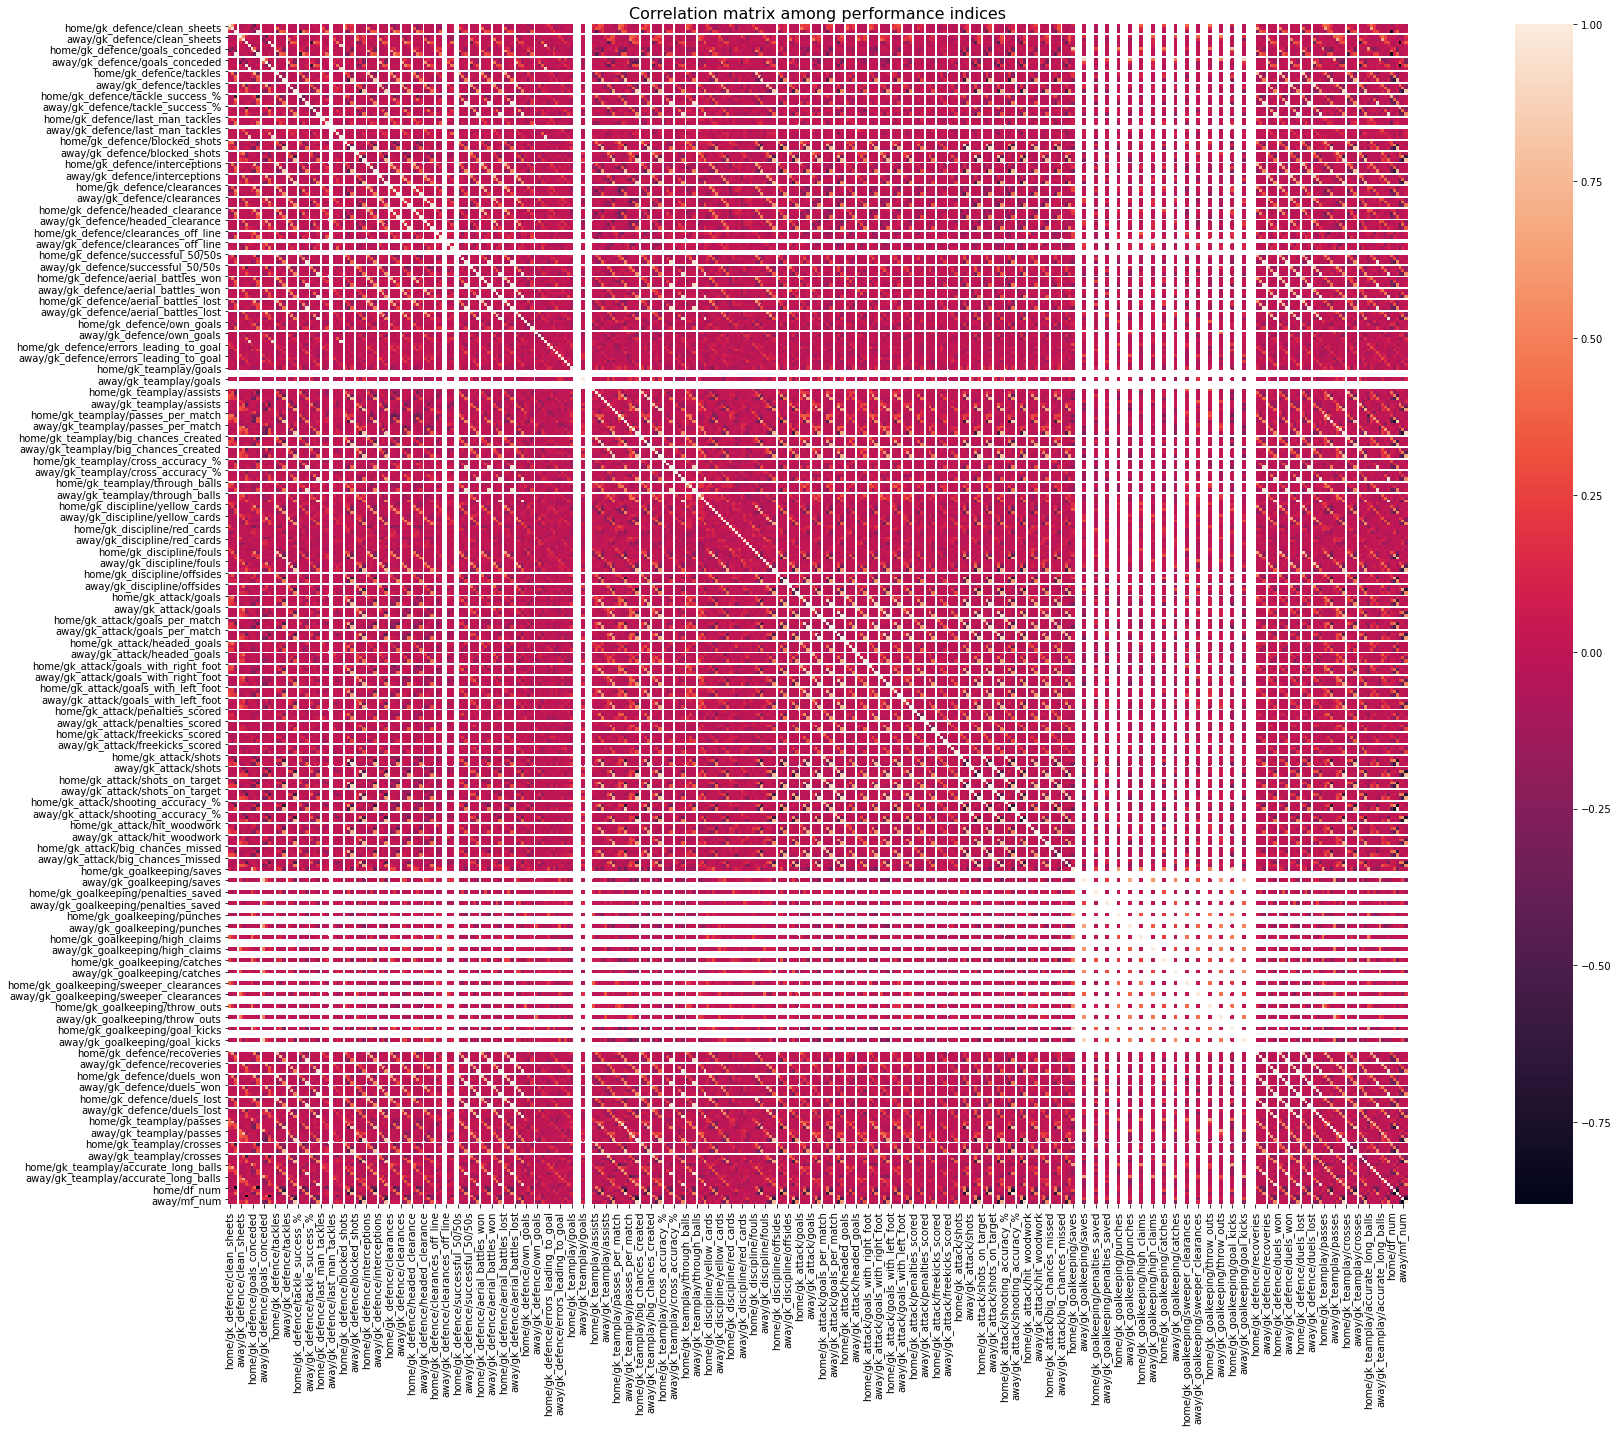

In [314]:
# Correlation among performance indices of players
corr_mat = df_scale.iloc[:, :-1].corr(method="spearman")

plt.figure(figsize=(30, 20))
sns.heatmap(corr_mat, square=True, annot=False, linewidths=0)
plt.title("Correlation matrix among performance indices", size=16)
plt.tight_layout()

In [278]:
# Get the most correlated pairs of indices
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

tri_corr_mat = corr_mat.unstack()
cells_to_drop = get_redundant_pairs(df_scale.iloc[:, :-1])
tri_corr_mat = tri_corr_mat.drop(labels=cells_to_drop).fillna(0).sort_values(ascending=False)

print("Top 10 positive correlated feature pairs:\n" + str(tri_corr_mat[0:10]))
print("\n----------------------------------------------------------------")
print("\nTop 10 negative correlated feature pairs:\n"+ str(tri_corr_mat[-10:]))
print("\n----------------------------------------------------------------")

Top 10 positive correlated feature pairs:
away/fw_defence/last_man_tackles    away/fw_defence/own_goals              1.000000
away/fw_defence/clean_sheets        away/fw_defence/goals_conceded         0.999999
away/df_attack/shots_on_target      away/df_attack/shooting_accuracy_%     0.998558
home/df_attack/shots_on_target      home/df_attack/shooting_accuracy_%     0.998337
home/fw_defence/duels_won           home/fw_defence/duels_lost             0.996361
away/fw_defence/duels_won           away/fw_defence/duels_lost             0.996007
home/fw_defence/recoveries          home/fw_defence/duels_won              0.995504
away/fw_defence/recoveries          away/fw_defence/duels_won              0.995094
home/fw_defence/aerial_battles_won  home/fw_defence/aerial_battles_lost    0.994342
home/fw_defence/recoveries          home/fw_defence/duels_lost             0.993380
dtype: float64

----------------------------------------------------------------

Top 10 negative correlated feature p

In [32]:
df = pd.read_csv(os.path.join(PRJ_ROOT_DIR, "data", "tabular", "integrate","lda", "matches.csv"))
df

,home_result,season,0_0,1_0,2_0,0_1,1_1,2_1,0_2,1_2,...,2_23,0_24,1_24,2_24,0_25,1_25,2_25,0_26,1_26,2_26
0,lose,2019/20,1.286584,7.035507,1.259102,-2.931753,0.062317,-1.631287,-2.707726,-0.607117,...,-100.000000,2.247774,-0.737455,-1.588368,2.059278,-1.289581,-0.214014,-0.025312,-0.479952,1.471758
1,win,2019/20,0.771112,2.864098,0.136227,-3.137167,-0.522932,-0.568367,-2.725580,-0.359102,...,-0.780148,1.990417,-0.727778,-2.796785,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
2,win,2019/20,1.081934,6.476357,1.060024,-3.610155,-0.617447,3.083772,-3.131397,-0.594232,...,2.718124,2.234902,-0.764160,-0.524770,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
3,win,2019/20,1.270547,6.125389,0.866984,-3.375562,-0.538387,-1.682440,-3.103326,0.157253,...,-100.000000,1.980681,-0.619516,-1.541976,1.383543,-0.932270,0.070167,1.083550,-0.641444,1.485667
4,win,2019/20,1.446074,7.081245,1.423544,-3.169787,-0.700700,0.751141,-2.441979,-0.588787,...,0.878456,2.518209,-0.529214,-3.471708,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,win,2021/22,1.096860,7.664981,1.030113,-3.110702,-0.419559,0.173017,-2.291735,-0.189176,...,-1.604356,2.068204,-0.881599,-1.226240,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
1136,win,2021/22,0.334105,3.979458,0.309591,-3.123301,-0.053396,-0.840144,-2.975121,-0.110232,...,-0.690187,2.041043,-1.006175,-3.622045,1.180349,-0.571187,-1.254287,-100.000000,-100.000000,-100.000000
1137,lose,2021/22,0.935548,6.279345,0.752885,-2.725118,-0.222117,-0.084760,-2.359624,-0.233390,...,-100.000000,2.089158,-0.930276,-3.477027,1.293585,-1.183664,2.243419,1.281312,-0.590887,0.282728
1138,win,2021/22,1.182444,7.042481,0.819191,-2.873911,-0.669088,0.491676,-2.763736,-0.132193,...,0.762411,1.627330,-1.141200,-1.083433,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000


In [33]:
set(df['season'])

{'2019/20', '2020/21', '2021/22'}

In [34]:
def stratify(df, frac, random_state):
    win_19_20 = df[(df['season'] == '2019/20') & (df['home_result'] == 'win')].sample(frac = frac, random_state = random_state)
    lose_19_20 = df[(df['season'] == '2019/20') & (df['home_result'] == 'lose')].sample(frac = frac, random_state = random_state)
    draw_19_20 = df[(df['season'] == '2019/20') & (df['home_result'] == 'draw')].sample(frac = frac, random_state = random_state)
    win_20_21 = df[(df['season'] == '2020/21') & (df['home_result'] == 'win')].sample(frac = frac, random_state = random_state)
    lose_20_21 = df[(df['season'] == '2020/21') & (df['home_result'] == 'lose')].sample(frac = frac, random_state = random_state)
    draw_20_21 = df[(df['season'] == '2020/21') & (df['home_result'] == 'draw')].sample(frac = frac, random_state = random_state)
    win_21_22 = df[(df['season'] == '2021/22') & (df['home_result'] == 'win')].sample(frac = frac, random_state = random_state)
    lose_21_22 = df[(df['season'] == '2021/22') & (df['home_result'] == 'lose')].sample(frac = frac, random_state = random_state)
    draw_21_22 = df[(df['season'] == '2021/22') & (df['home_result'] == 'draw')].sample(frac = frac, random_state = random_state)
    df_test = pd.concat([win_19_20,lose_19_20,draw_19_20,win_20_21,lose_20_21,draw_20_21,win_21_22,lose_21_22,draw_21_22], axis = 0)
    df_train = pd.concat([df,df_test]).drop_duplicates(keep=False)
    return df_train, df_test

In [35]:
df_train, df_test = stratify(df, 0.1,42)
df_train, df_dev = stratify(df_train, 0.1,42)

In [36]:
df_train

,home_result,season,0_0,1_0,2_0,0_1,1_1,2_1,0_2,1_2,...,2_23,0_24,1_24,2_24,0_25,1_25,2_25,0_26,1_26,2_26
1,win,2019/20,0.771112,2.864098,0.136227,-3.137167,-0.522932,-0.568367,-2.725580,-0.359102,...,-0.780148,1.990417,-0.727778,-2.796785,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
2,win,2019/20,1.081934,6.476357,1.060024,-3.610155,-0.617447,3.083772,-3.131397,-0.594232,...,2.718124,2.234902,-0.764160,-0.524770,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
3,win,2019/20,1.270547,6.125389,0.866984,-3.375562,-0.538387,-1.682440,-3.103326,0.157253,...,-100.000000,1.980681,-0.619516,-1.541976,1.383543,-0.932270,0.070167,1.083550,-0.641444,1.485667
4,win,2019/20,1.446074,7.081245,1.423544,-3.169787,-0.700700,0.751141,-2.441979,-0.588787,...,0.878456,2.518209,-0.529214,-3.471708,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
7,lose,2019/20,1.173285,8.483795,1.107055,-2.988853,-0.772435,-0.359655,-2.667527,-0.375310,...,-100.000000,1.699374,-0.040017,-0.565101,1.638528,-0.213811,-2.286652,0.161067,-0.438248,0.665433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,win,2021/22,1.096860,7.664981,1.030113,-3.110702,-0.419559,0.173017,-2.291735,-0.189176,...,-1.604356,2.068204,-0.881599,-1.226240,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
1136,win,2021/22,0.334105,3.979458,0.309591,-3.123301,-0.053396,-0.840144,-2.975121,-0.110232,...,-0.690187,2.041043,-1.006175,-3.622045,1.180349,-0.571187,-1.254287,-100.000000,-100.000000,-100.000000
1137,lose,2021/22,0.935548,6.279345,0.752885,-2.725118,-0.222117,-0.084760,-2.359624,-0.233390,...,-100.000000,2.089158,-0.930276,-3.477027,1.293585,-1.183664,2.243419,1.281312,-0.590887,0.282728
1138,win,2021/22,1.182444,7.042481,0.819191,-2.873911,-0.669088,0.491676,-2.763736,-0.132193,...,0.762411,1.627330,-1.141200,-1.083433,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000


In [37]:
df_test

,home_result,season,0_0,1_0,2_0,0_1,1_1,2_1,0_2,1_2,...,2_23,0_24,1_24,2_24,0_25,1_25,2_25,0_26,1_26,2_26
182,win,2019/20,1.536536,8.177021,1.602782,-2.661029,0.097083,0.301337,-2.237061,0.078168,...,-100.000000,2.448162,-0.990570,-2.466690,1.681891,-0.716268,-2.614870,-100.00000,-100.000000,-100.000000
309,win,2019/20,-0.031700,1.766449,-0.075776,-2.315698,0.118815,0.452492,-1.848109,-0.283806,...,2.718124,2.234902,-0.764160,-0.524770,-100.000000,-100.000000,-100.000000,-100.00000,-100.000000,-100.000000
339,win,2019/20,0.378822,4.285239,0.509951,-3.139358,-0.116404,-0.984386,-2.080785,0.001640,...,1.073650,1.863410,-0.504375,-1.191016,-100.000000,-100.000000,-100.000000,-100.00000,-100.000000,-100.000000
142,win,2019/20,1.194837,7.327352,0.996753,-4.509485,-3.310870,-2.077030,-3.171962,0.136728,...,-100.000000,1.809831,-0.809475,-2.676364,1.270483,-0.813948,-0.441008,-100.00000,-100.000000,-100.000000
347,win,2019/20,1.173285,8.483795,1.107055,-2.667527,-0.375310,-0.897896,-2.449709,-0.218655,...,-100.000000,1.953037,-0.584392,-0.328067,1.546974,-0.945667,-1.565364,-100.00000,-100.000000,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,draw,2021/22,1.096860,7.664981,1.030113,-3.110702,-0.419559,0.173017,-2.349527,0.057917,...,-100.000000,1.891796,-0.965173,0.234975,1.148664,-0.378372,0.064083,0.83945,-2.063865,1.925707
1058,draw,2021/22,1.013134,6.860015,0.894242,-2.852225,0.416182,-1.125308,-2.672557,0.256265,...,-100.000000,2.259325,-1.141521,-0.983948,0.369468,0.373364,-0.189544,0.10836,-0.214514,0.644158
819,draw,2021/22,0.907753,5.389160,0.359024,-2.686422,-0.727165,0.404619,-2.412244,-0.062521,...,-0.079379,2.089158,-0.930276,-3.477027,1.276475,-0.041226,0.320480,-100.00000,-100.000000,-100.000000
849,draw,2021/22,0.935548,6.279345,0.752885,-2.359624,-0.233390,0.407027,-2.339914,-0.516507,...,1.453653,1.650806,-0.517882,-0.788785,-100.000000,-100.000000,-100.000000,-100.00000,-100.000000,-100.000000


In [38]:
df_dev

,home_result,season,0_0,1_0,2_0,0_1,1_1,2_1,0_2,1_2,...,2_23,0_24,1_24,2_24,0_25,1_25,2_25,0_26,1_26,2_26
203,win,2019/20,-0.123152,2.260163,-0.255209,-1.615080,0.910990,-0.095468,-0.802083,-1.025453,...,1.024544,2.303662,-0.731525,-4.038723,1.279985,-1.265589,-0.507694,-100.000000,-100.000000,-100.000000
349,win,2019/20,-0.031700,1.766449,-0.075776,-2.061498,-0.618871,0.392235,-1.848109,-0.283806,...,-100.000000,1.798679,-1.413313,0.883965,1.615694,-0.739680,0.868444,1.294567,-1.105075,-1.195351
73,win,2019/20,0.658585,4.173457,0.936546,-3.610155,-0.617447,3.083772,-3.131397,-0.594232,...,-0.392634,1.734317,-0.411149,-3.932580,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
70,win,2019/20,1.216901,7.283627,1.473741,-2.142227,0.306419,0.472126,-2.100349,0.955673,...,-100.000000,2.316190,-0.621056,-5.420764,1.632143,-0.580183,-0.883915,-100.000000,-100.000000,-100.000000
286,win,2019/20,1.642531,7.461201,0.999634,-2.947372,-0.192627,-2.471519,-2.610531,-0.604717,...,2.718124,2.234902,-0.764160,-0.524770,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,draw,2021/22,0.280909,6.273857,1.171780,-3.263442,0.598363,-1.123010,-2.989256,0.238815,...,-1.562499,1.180349,-0.571187,-1.254287,0.552761,-0.944647,1.283119,-100.000000,-100.000000,-100.000000
896,draw,2021/22,1.031642,6.347971,0.806500,-2.166424,-0.438322,-0.896570,-1.981579,0.210358,...,-100.000000,1.785491,-0.777797,-2.680726,1.712006,-0.654294,-0.032038,1.354063,-1.294177,-0.746675
930,draw,2021/22,0.907753,5.389160,0.359024,-2.686422,-0.727165,0.404619,-2.210593,0.149857,...,-100.000000,2.031852,-0.504566,-1.200281,1.308024,-0.487829,0.844221,-100.000000,-100.000000,-100.000000
833,draw,2021/22,1.066269,7.632137,1.409428,-3.086782,-0.101619,-0.764782,-2.607773,-0.183856,...,-100.000000,2.170555,-0.472269,-2.166859,1.346905,-0.785938,-1.983529,-100.000000,-100.000000,-100.000000


In [39]:
df_train.to_csv('train.csv')
df_test.to_csv('test.csv')
df_dev.to_csv('dev.csv')